# Correlation Matrix
As part of the preparation for clustering the correlations of network parameters are investigated.

In [1]:
import warnings
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), "../../..")) # Determine the project's root directory
sys.path.append(PROJECT_ROOT) # Add the project root directory to Python's module search path.

import matplotlib.pyplot as plt
import seaborn as sns

from plotting.plotting_classification import plot_correlation_matrix

warnings.filterwarnings('ignore')

read grid parameters

In [2]:
from classification.database_communication.DatabaseCommunication import DatabaseCommunication

dc = DatabaseCommunication()
df_parameters_of_grids = dc.get_clustering_parameters_for_classification_version()

Database connection is constructed. 


prepare correlation matrix

In [3]:
df_corr = df_parameters_of_grids.drop(
    ['version_id', 'plz', 'bcid', 'kcid', 'ratio', 'house_distance_km', 'no_connection_buses', 'resistance',
     'reactance',  #'osm_trafo',
     'simultaneous_peak_load_mw',
     'no_household_equ',
     'max_power_mw'], axis=1)
corr = df_corr.corr()

plot correlation matrix

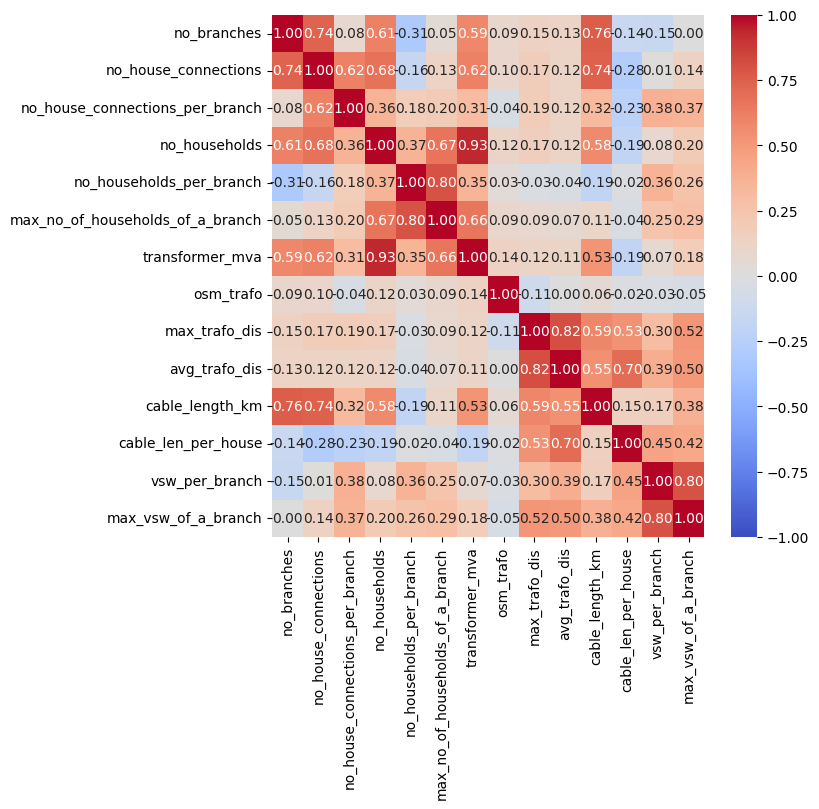

In [4]:
plot_correlation_matrix(corr)

plot clustermap: correlation sorted into groups of high correlation

<Figure size 640x480 with 0 Axes>

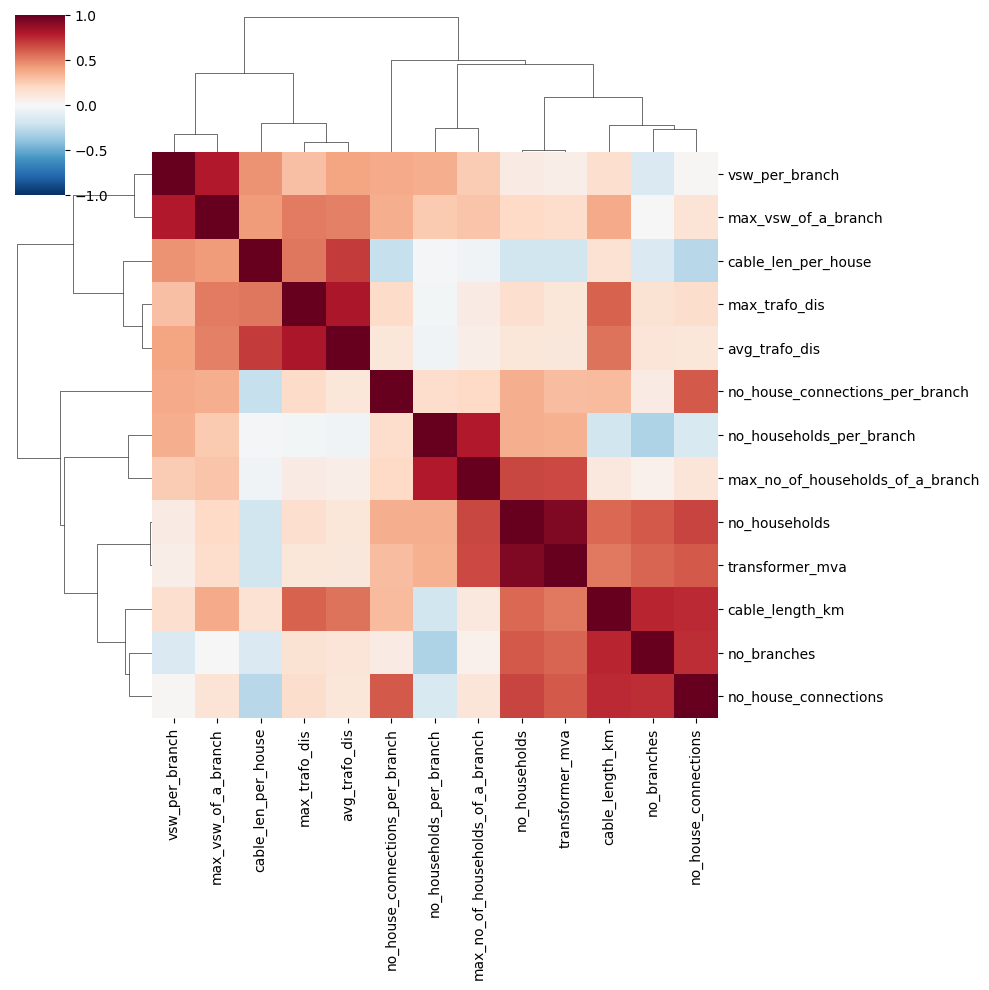

In [5]:
plt.figure()
df_corr = df_parameters_of_grids.drop(
    ['version_id', 'plz', 'bcid', 'kcid', 'ratio', 'house_distance_km', 'no_connection_buses', 'resistance',
     'reactance', 'osm_trafo',
     'simultaneous_peak_load_mw',
     'no_household_equ',
     'max_power_mw'], axis=1)
corr = df_corr.corr()
sns.clustermap(corr, metric="correlation", method="single", cmap="RdBu_r", vmin=-1, vmax=1)
# plt.savefig('clustermap.png', dpi=600)
plt.show()